## Step1. 탐색 : 데이터의 기초 정보 살펴보기

### Chipotle 데이터셋의 기본정보 

In [1]:
#pandas 모듈 임포트
import pandas as pd

#read_csv() 함수로 데이터를 Dataframe 형태로 불러옵니다. 
#pd.read_csv("파일 경로를 포함한 파일명", sep = "구분자")
#raw data를 상대 경로로 불러오기 
file_path = '../data/chipotle.tsv'
chipo = pd.read_csv(file_path, sep="\t") #불러들인 파일의 정보를 chipo 변수에 담는다

chipo.shape #shape() 데이터의 행,열 크기 반환

print(chipo.info()) #info() 행, 열의 구성정보 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB
None


In [2]:
#head() 데이터 프레임에서 위에서부터 10개의 데이터 보여주기
#tail() 밑에서 부터 데이터 보여주기
chipo.head(10)
chipo.tail()

,order_id,quantity,item_name,choice_description,item_price
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75
4621,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$8.75


In [3]:
#columns()함수로 컴럼의 정보를 보여줌
chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [4]:
#인덱스의 범위
chipo.index

RangeIndex(start=0, stop=4622, step=1)

### quantity 와 item_price의 요약 통계

### describe() 수치형 요약통계

In [5]:
#describe() 함수로 요약통계량 출력하기 -> 수치형만!!
chipo.describe()

#count 수
#mean 평균
#std 표준편차
#min 최소값
#25% 사분의 일
#50% 사분의 이 

,order_id,quantity
count,4622.000000,4622.000000
mean,927.254868,1.075725
std,528.890796,0.410186
min,1.000000,1.000000
25%,477.250000,1.000000
50%,926.000000,1.000000
75%,1393.000000,1.000000
max,1834.000000,15.000000


In [6]:
#order_id는 숫자의 의미를 가지지 않기 때문에 문자타입(str)으로 변환 
chipo['order_id'] = chipo['order_id'].astype(str)
chipo.describe()

,quantity
count,4622.000000
mean,1.075725
std,0.410186
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,15.000000


### unique() 로 범주형 피처의 개수 출력하기

In [7]:
#order_id 개수 출력(중복되는 것 빼고 길이구함)
len(chipo['order_id'].unique()) #unique() 중복되는 것 빼고 고유한 범주

1834

In [8]:
#item_name 개수 출력 
len(chipo['item_name'].unique())

50

## Step2. 인사이트 발견: 탐색과 시각화

### .value_counts()[:5]  -> 가장 많이 주문한 것 순서대로, 시리즈 객체에만 적용! 


In [9]:
#가장 많이 주문한 아이템 top10
chipo['item_name'].value_counts()[:10] #item_name 의 0번째부터 10번까지 숫자형 value 를 카운트함

Chicken Bowl                    726
Chicken Burrito                 553
Chips and Guacamole             479
Steak Burrito                   368
Canned Soft Drink               301
Steak Bowl                      211
Chips                           211
Bottled Water                   162
Chicken Soft Tacos              115
Chips and Fresh Tomato Salsa    110
Name: item_name, dtype: int64

In [10]:
item_count = chipo['item_name'].value_counts()[:10]

#Top idx :  를 붙이기 위해 for문을 사용 
for idx,(itemName,count) in enumerate(item_count.iteritems(),1): #iteritems() 열을 순회하는 함수 . 1은 idx의 시작값
    print("Top", idx, ":", itemName, count)

Top 1 : Chicken Bowl 726
Top 2 : Chicken Burrito 553
Top 3 : Chips and Guacamole 479
Top 4 : Steak Burrito 368
Top 5 : Canned Soft Drink 301
Top 6 : Steak Bowl 211
Top 7 : Chips 211
Top 8 : Bottled Water 162
Top 9 : Chicken Soft Tacos 115
Top 10 : Chips and Fresh Tomato Salsa 110


### item당 주문 개수와 총량 구하기 groupby()

In [11]:
#item 당 주문 개수를 출력합니다
#groupby() 함수는 데이터 프레임에서 특정 피처를 기준으로 그룹을 생성하여 이를 통해 그룹별 연산 적용
order_count = chipo.groupby('item_name')['order_id'].count() #item_name을 기준으로  주문한 아이디의 수를 구한다.
order_count[:10]

item_name
6 Pack Soft Drink         54
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     11
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            162
Bowl                       2
Burrito                    6
Canned Soda              104
Name: order_id, dtype: int64

In [12]:
#아이템별 주문총량
item_quantity = chipo.groupby('item_name')['quantity'].sum()#item_name을 기준으로 quantity의 합을 구한다
item_quantity[:10]

item_name
6 Pack Soft Drink         55
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     12
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            211
Bowl                       4
Burrito                    6
Canned Soda              126
Name: quantity, dtype: int64

## 시각화로 분석결과 살펴보기

In [13]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

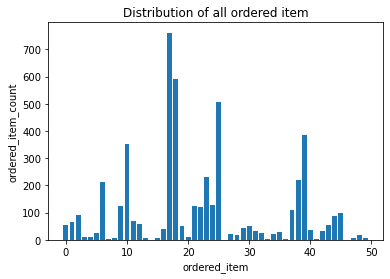

In [14]:
#아이템별 주문의 총량을 막대 그래프로 시각화
#tolist()는 시리즈를 리스트로 변환하는 함수 

item_name_list = item_quantity.index.tolist() #item_quantity 의 index를 tolist() 1차원 리스트로 만듦

#numpy.arange(시작, 끝, 간격)으로 배열 만들기 
x_pos = np.arange(len(item_name_list)) #x축: item_name의 리스트의 길이
order_cnt = item_quantity.values.tolist() #item_quantity 의 value를 tolist() 1차원 리스트로 만듦

#bar()는 막대 그래프를 출력해주는 함수 bar(x축, y축)
plt.bar(x_pos, order_cnt, align='center')
plt.ylabel('ordered_item_count') # y라벨
plt.xlabel('ordered_item') # x라벨
plt.title('Distribution of all ordered item') #제목

plt.show()

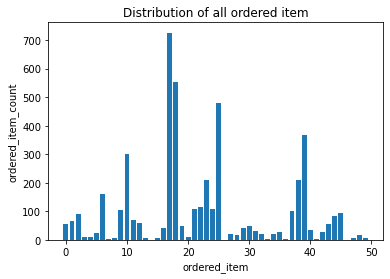

In [15]:
#아이템별 주문 개수 그래프

item_name_list = order_count.index.tolist() #item_quantity 의 index를 tolist() 1차원 리스트로 만듦

#numpy.arange(시작, 끝, 간격)으로 배열 만들기 
x_pos = np.arange(len(item_name_list)) #item_name의 리스트의 길이
order_cnt2 = order_count.values.tolist() #order_count 의 value를 tolist() 1차원 리스트로 만듦

#bar()는 막대 그래프를 출력해주는 함수 bar(x축, y축)
plt.bar(x_pos, order_cnt2, align='center')
plt.ylabel('ordered_item_count') # y라벨
plt.xlabel('ordered_item') # x라벨
plt.title('Distribution of all ordered item') #제목

plt.show()


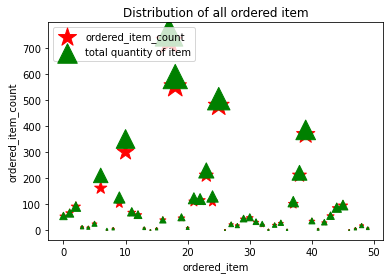

In [16]:
# 산점도

item_name_list = order_count.index.tolist() 


x_pos = np.arange(len(item_name_list)) 

order_cnt2 = order_count.values.tolist() 
order_cnt = item_quantity.values.tolist()


plt.scatter(x_pos, order_cnt2, s=order_cnt2,label="ordered_item_count", c="red", marker="*")
plt.scatter(x_pos, order_cnt, s=order_cnt, label= "total quantity of item", c="green", marker="^" )
plt.ylabel('ordered_item_count') 
plt.xlabel('ordered_item') 
plt.title('Distribution of all ordered item')
plt.legend(loc='upper left')

plt.show()

### 미니퀴즈 1-1
### pandas에서 유용하게 사용되는 함수 value_counts()와 unique()의 차이

In [17]:
chipo['item_name'].value_counts()

Chicken Bowl                             726
Chicken Burrito                          553
Chips and Guacamole                      479
Steak Burrito                            368
Canned Soft Drink                        301
Steak Bowl                               211
Chips                                    211
Bottled Water                            162
Chicken Soft Tacos                       115
Chips and Fresh Tomato Salsa             110
Chicken Salad Bowl                       110
Canned Soda                              104
Side of Chips                            101
Veggie Burrito                            95
Barbacoa Burrito                          91
Veggie Bowl                               85
Carnitas Bowl                             68
Barbacoa Bowl                             66
Carnitas Burrito                          59
Steak Soft Tacos                          55
6 Pack Soft Drink                         54
Chips and Tomatillo Red Chili Salsa       48
Chicken Cr

In [18]:
type(chipo['item_name'].value_counts()) #value_counts() 시리즈 

pandas.core.series.Series

In [19]:
chipo['item_name'].unique()

array(['Chips and Fresh Tomato Salsa', 'Izze', 'Nantucket Nectar',
       'Chips and Tomatillo-Green Chili Salsa', 'Chicken Bowl',
       'Side of Chips', 'Steak Burrito', 'Steak Soft Tacos',
       'Chips and Guacamole', 'Chicken Crispy Tacos',
       'Chicken Soft Tacos', 'Chicken Burrito', 'Canned Soda',
       'Barbacoa Burrito', 'Carnitas Burrito', 'Carnitas Bowl',
       'Bottled Water', 'Chips and Tomatillo Green Chili Salsa',
       'Barbacoa Bowl', 'Chips', 'Chicken Salad Bowl', 'Steak Bowl',
       'Barbacoa Soft Tacos', 'Veggie Burrito', 'Veggie Bowl',
       'Steak Crispy Tacos', 'Chips and Tomatillo Red Chili Salsa',
       'Barbacoa Crispy Tacos', 'Veggie Salad Bowl',
       'Chips and Roasted Chili-Corn Salsa',
       'Chips and Roasted Chili Corn Salsa', 'Carnitas Soft Tacos',
       'Chicken Salad', 'Canned Soft Drink', 'Steak Salad Bowl',
       '6 Pack Soft Drink', 'Chips and Tomatillo-Red Chili Salsa', 'Bowl',
       'Burrito', 'Crispy Tacos', 'Carnitas Crispy Tacos

In [20]:
type(chipo['item_name'].unique()) #unique() 배열 

numpy.ndarray

In [21]:
type(chipo['item_name'].unique().tolist()) #tolist() 1차원 배열로 만들어 줌 

list

# Step3.데이터 전처리

## [apply 와 lambda 함수를 이용한 데이터 전처리]

In [22]:
chipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   object
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(1), object(4)
memory usage: 180.7+ KB


In [23]:
chipo['item_price'].head(10) #상위 10개만 출력 

0     $2.39 
1     $3.39 
2     $3.39 
3     $2.39 
4    $16.98 
5    $10.98 
6     $1.69 
7    $11.75 
8     $9.25 
9     $9.25 
Name: item_price, dtype: object

In [24]:
# column 단위 데이터에 apply() 함수로 전처리를 적용
# item_price 문자열 타입의 데이터를 수치형으로 전처리 
# apply() 함수는 시리즈 단위의 연산을 처리하는 기능을 수행하며, sum() 이나 mean() 과 같이 연산이 정의된 함수를 파라미터로 받음 
# lambda 뒤에 나오는 인수는 함수에서 사용될 변수 x를 정의하며, 변수를 실수형으로 변환하는 float() 함수에 적용시킨 결과를 x에 다시 대입
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x[1:]))
chipo['item_price']

0        2.39
1        3.39
2        3.39
3        2.39
4       16.98
        ...  
4617    11.75
4618    11.75
4619    11.25
4620     8.75
4621     8.75
Name: item_price, Length: 4622, dtype: float64

# Step4. 탐색적 분석

### 주문당 평균 계산금액 출력하기

In [25]:
# 주문당이므로 order_id로 그룹을 생성한 뒤, item_price 피처에 sum() 함수를 적용하고 mean() 함수를 추가 

#order_id 당 주문 금액 합계 .sum()
chipo.groupby('order_id')['item_price'].sum() 

order_id
1       11.56
10      13.20
100     10.08
1000    20.50
1001    10.08
        ...  
995     24.95
996     43.00
997     22.50
998     10.88
999     29.25
Name: item_price, Length: 1834, dtype: float64

In [26]:
# 주문당 계산 금액 평균
chipo.groupby('order_id')['item_price'].sum().mean() 

18.811428571428717

In [27]:
chipo.groupby('order_id').sum().mean() 

quantity       2.711014
item_price    18.811429
dtype: float64

In [28]:
#서식을 이용해서 원하는 결과 출력하기 
num2 = chipo.groupby('order_id')['item_price'].sum().mean() 
print("%.2f" % num2) #소수점 2자리까지 출력하기 

18.81


### 한 주문에 10달러 이상  id 출력하기

In [29]:
# sum() 함수로 주문당 주문수량과 주문가격 계산
chipo_orderid_group = chipo.groupby('order_id').sum()
chipo_orderid_group

,quantity,item_price
order_id,,
1,4,11.56
10,2,13.20
100,2,10.08
1000,2,20.50
1001,2,10.08
...,...,...
995,3,24.95
996,4,43.00
997,2,22.50


In [30]:
# chipo_orderid_group 결과 중 item_price의 값이 10 값 이상인 것만 필터링하여 result 변수에 대입 
result = chipo_orderid_group[chipo_orderid_group.item_price >=10] 
result[:10]
result.index.values

array(['1', '10', '100', ..., '997', '998', '999'], dtype=object)

### 각 아이템의 가격 구하기


In [31]:
# 1단계: 수량이 1개인 것 선별
chipo_one_item = chipo[chipo.quantity ==1] 
chipo_one_item

# 2단계 ;가격이 가장 낮은 것이 기본 가격일 것이라고 추측함- item_name으로 그루핑하여 min() 함수 적용
price_per_item = chipo_one_item.groupby('item_name').min()
price_per_item 

# 3단계: sort_values() 함수를 통해 item_price를 기준으로 정렬
# ascending = False 내림차순, ascending = True 오름차순, 생략시 오름차순으로 정렬 
price_per_item.sort_values(by = "item_price", ascending=False)
price_per_item.sort_values(by = "item_price", ascending=True)[:10]


,order_id,quantity,choice_description,item_price
item_name,,,,
Bottled Water,1009,1,NaN,1.09
Canned Soda,100,1,[Coca Cola],1.09
Canned Soft Drink,1003,1,[Coke],1.25
Side of Chips,1002,1,NaN,1.69
Chips,1005,1,NaN,1.99
Chips and Fresh Tomato Salsa,1,1,NaN,2.29
Chips and Tomatillo-Red Chili Salsa,1215,1,NaN,2.39
Chips and Tomatillo-Green Chili Salsa,1,1,NaN,2.39
Chips and Roasted Chili-Corn Salsa,1156,1,NaN,2.39


## 아이템 가격 분포 그래프를 출력

In [32]:
# x 축 : 아이템의 이름인데 너무 길어서 list 형식으로 표현 
# price_per_item의 index를 1차원 리스트로 변환해서 item_list변수에 대입 
item_name_list = price_per_item.index.tolist()

# len(item_name_list)
x_pos = np.arange(len(item_name_list))

# y축
# price_per_item 중 item_price를 시리즈로 추출한 후 tolist()함수로 1차원 리스트 생성
item_price = price_per_item['item_price'].tolist()

### 막대 그래프 출력

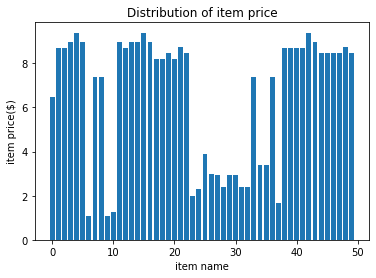

In [33]:
plt.bar(x_pos, item_price)
plt.xlabel('item name')
plt.ylabel('item price($)')
plt.title('Distribution of item price')

plt.show()

### 아이템 가격 히스토그램


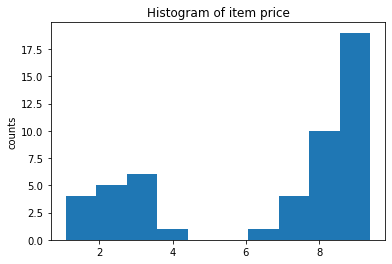

In [34]:
plt.hist(item_price)

plt.ylabel('counts')
plt.title('Histogram of item price')
plt.show()

### 가장 비싼 주문에서 아이템이 총 몇 개 팔렸는지 구하기

In [35]:
#order_id의 로 주문의 총합을 구한다->  정렬: item_price 순으로 내림차순 정렬 
chipo.groupby('order_id').sum().sort_values(by='item_price', ascending = False)[:5]

,quantity,item_price
order_id,,
926,23,205.25
1443,35,160.74
1483,14,139.00
691,11,118.25
1786,20,114.30


### Veggie Salad Bowl 이 몇 번 주문되었는지 구하기


In [36]:
#방법1:
# item_name을 기준으로 수량을 뽑는다. -> Vessie Salad Bowl 의 수량을 프린트  
chipoTotal = chipo.groupby('item_name')['quantity'].sum()
chipoTotal.loc['Veggie Salad Bowl']

18

In [42]:
#방법2:
chipo_salad = chipo[chipo['item_name'] == "Veggie Salad Bowl"]
# 한 주문 내에서 중복 집계된 item_name을 제거합니다
# drop_duplicates(['a','b'])  a와  b가 중복되는 것을 삭제 
chipo_salad = chipo_salad.drop_duplicates(['item_name', 'order_id'])
chipo_salad
print(len(chipo_salad))


#방법3:
print(len(chipo[chipo['item_name'] == "Veggie Salad Bowl"]))

18
18


### Chicken Bowl 을 2개 이상 주문한 고객들의 Chicken Bowl 메뉴에 대한 총 주문횟수 구하기

In [38]:
ChickenBowl = chipo[chipo['item_name'] == 'Chicken Bowl'] #item_name이 Chicken Bowl 인 것 찾기 

ChickenBowl2 = ChickenBowl[ChickenBowl.quantity >=2] # 찾은 것들 중에서 quantity 가 2 이상인 것 찾기 
ChickenBowl2
print(len(ChickenBowl2)) #길이를 출력 

33


In [39]:
#2개 이상 주문한 고객의 총 주문 수량
ChickenBowl3 = ChickenBowl2.sum()
ChickenBowl3.loc['quantity']

68

In [44]:
#Chicken Bowl 을 2개 이상 주문한 고객들의 Chicken Bowl 메뉴의 총 주문 수량 구하기
Chipo_chicken = chipo[chipo['item_name'] == 'Chicken Bowl'] 
#order_id로 수치형 데이터를 다 구하는 데(sum) 그 중 quantitiy 만 구하기  
chipo_chicken_ordersum = Chipo_chicken.groupby('order_id').sum()['quantity']
chipo_chicken_result = chipo_chicken_ordersum[chipo_chicken_ordersum >= 2]
len(chipo_chicken_result)

order_id
10      1
1000    1
1004    2
1006    1
1008    1
       ..
991     1
992     1
995     1
997     2
998     1
Name: quantity, Length: 615, dtype: int64
